<a href="https://colab.research.google.com/github/AlejandrodelaConcha/Deep-Learning/blob/master/Alejandro_de_la_Concha_TD1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os

path=os.path.dirname(os.getcwd())
sys.path.append(path)
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
from keras.utils import np_utils
import copy
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

def generate_rectangles(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return [generate_a_drawing(figsize, U, V,noise),generate_a_drawing(figsize, U, V,0)]


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_disks(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return [generate_a_drawing(figsize, U, V,noise),generate_a_drawing(figsize, U, V,0)]

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_triangles(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata= generate_a_drawing(figsize, U, V, 0)
    imdata_noisy= generate_a_drawing(figsize, U, V, noise)
    return [imdata_noisy,imdata,  [U[0], V[0], U[1], V[1], U[2], V[2]]]


#im = generate_a_rectangle(10, True)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#im = generate_a_disk(10)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#[im, v] = generate_a_triangle(20, False)
#plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False,verbose=True):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            if(verbose):
                print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]


def generate_test_set_classification(free_location=False,verbose=True):
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, free_location,verbose)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0,free_location=True,verbose=True):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            if verbose:
                print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, free_location)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()
    

def generate_test_set_regression(free_location=True,verbose=False):
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20,free_location,verbose=False)
    return [X_test, Y_test]


def generate_dataset_denoising(nb_samples, noise=0.0, free_location=False,verbose=True):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            if verbose:
                print(i)
        category = np.random.randint(3)
        if category == 0:
            [X[i],Y[i]] = generate_rectangles(noise, free_location)
        elif category == 1: 
            [X[i],Y[i]]= generate_disks(noise, free_location)
        else:
            [X[i],Y[i], V] = generate_triangles(noise, free_location)
    
    X = (X  + noise)/ (255 + 2 * noise)    
    Y = (Y) / (255)
    return [X, Y]

def generate_test_set_denoising(verbose=True):
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300, 20,True,verbose)
    return [X_test, Y_test]

def compute_angles(Y):
    Y=Y+1
    first_vector_1=Y[[2,3]]-Y[[0,1]]
    second_vector_1=Y[[4,5]]-Y[[0,1]]
    cos_1= first_vector_1.dot(second_vector_1)/(np.sqrt(np.dot(first_vector_1,first_vector_1))*np.sqrt(np.dot(second_vector_1,second_vector_1)))
    theta_1=np.arccos(cos_1)

    first_vector_2=Y[[0,1]]-Y[[2,3]]
    second_vector_2=Y[[4,5]]-Y[[2,3]]
    cos_2= first_vector_2.dot(second_vector_2)/(np.sqrt(np.dot(first_vector_2,first_vector_2))*np.sqrt(np.dot(second_vector_2,second_vector_2)))
    theta_2=np.arccos(cos_2)

    first_vector_3=Y[[0,1]]-Y[[4,5]]
    second_vector_3=Y[[2,3]]-Y[[4,5]]
    cos_3= first_vector_3.dot(second_vector_3)/(np.sqrt(np.dot(first_vector_3,first_vector_3))*np.sqrt(np.dot(second_vector_3,second_vector_3)))
    theta_3=np.arccos(cos_3)

    return(np.array([theta_1,theta_2,theta_3]))
    
def order_by_angles(Y):
    Y_ordered=copy.deepcopy(Y)
    if(len(Y.shape)>1):
        for i in range(Y.shape[0]):
            thetas=compute_angles(Y[i])
            first_point=np.argsort(thetas)
            Y_ordered[i][[0,2,4]]=Y[i][[0,2,4]][first_point]
            Y_ordered[i][[1,3,5]]=Y[i][[1,3,5]][first_point]
    else:
        thetas=compute_angles(Y)
        first_point=np.argsort(thetas)
        Y_ordered[[0,2,4]]=Y[[0,2,4]][first_point]
        Y_ordered[[1,3,5]]=Y[[1,3,5]][first_point]
    return(Y_ordered)
    


from keras.models import Sequential,Model,load_model
from keras.layers import Dense,Dropout,Input,Flatten,Conv2D, MaxPooling2D,UpSampling2D,merge,concatenate,BatchNormalization
from keras.utils import np_utils
from keras import optimizers,layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


# Simple Classification

I generated a dataset with 300 observtions.

In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20,verbose=False) ### I add verbose to not see the number of points
Y_train=np_utils.to_categorical(Y_train)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])

Creating data:


As the first task is classification, the problem suggests to create a linear classifier that will be equivalent to just have a layer representing the three classes with softmax as activation function. The loss function used in the problem was cross entropy. 

I trained 3 different models with different optimizers. The goal is to compare ADAM vs the Stochastic Gradient Descent (SGD) as indicated in the HW. The three models were trained by using 100 epochs. For the ADAM model I used a batch size of 32, for the SG a learning rate of 0.1 and 0.001. Aditionally, I analyzed the modified SGD with a momentum of 0.9. 

In [0]:
################# ADAM

model_ADAM=Sequential()
model_ADAM.add(Dense(3,activation="softmax",input_shape=(X_train.shape[1],)))
model_ADAM.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
evolution_ADAM=model_ADAM.fit(X_train,Y_train,
          batch_size=32,epochs=100,verbose=0)

################# SGD 1 with lr=0.01

model_SGD_1=Sequential()
model_SGD_1.add(Dense(3,activation="softmax",input_shape=(X_train.shape[1],)))
sgd = optimizers.SGD()
model_SGD_1.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])
evolution_SGD_1=model_SGD_1.fit(X_train,Y_train,epochs=100,verbose=0)

################# SGD with lr=0.001

model_SGD_2=Sequential()
model_SGD_2.add(Dense(3,activation="softmax",input_shape=(X_train.shape[1],)))
sgd = optimizers.SGD(lr=0.001)
model_SGD_2.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])
evolution_SGD_2=model_SGD_2.fit(X_train,Y_train,epochs=100,verbose=0)

################# SGD 3 with lr=0.001 and momentum=0.9

model_SGD_3=Sequential()
model_SGD_3.add(Dense(3,activation="softmax",input_shape=(X_train.shape[1],)))
sgd = optimizers.SGD(lr=0.001,momentum=0.9)
model_SGD_3.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])
evolution_SGD_3=model_SGD_3.fit(X_train,Y_train,epochs=100,verbose=0)

I generate the test set to compare the models. 

In [4]:
[X_test, Y_test]=generate_test_set_classification(verbose=False)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1])

Creating data:


We can see in the figure bellow how the ADAM optimizer converged faster compared with the SGD without momentum. In fact, in practice, the ADAM optimizer is commonly preferred.
Additionally, we can see the sensitivity of the SGD to the learning rate. A bad value of the learning rate can lead to poor results as the orange line indicates.
In this example, we can see how adding the momentum parameter can improve a lot the performance of the SGD optimizer by allowing it to scape from saddle points. 
As we saw in the lectures, in general, the choice of the optimizer depends more on our knowledge of how to modify the parameters.

Text(0.5,0,'epoch')

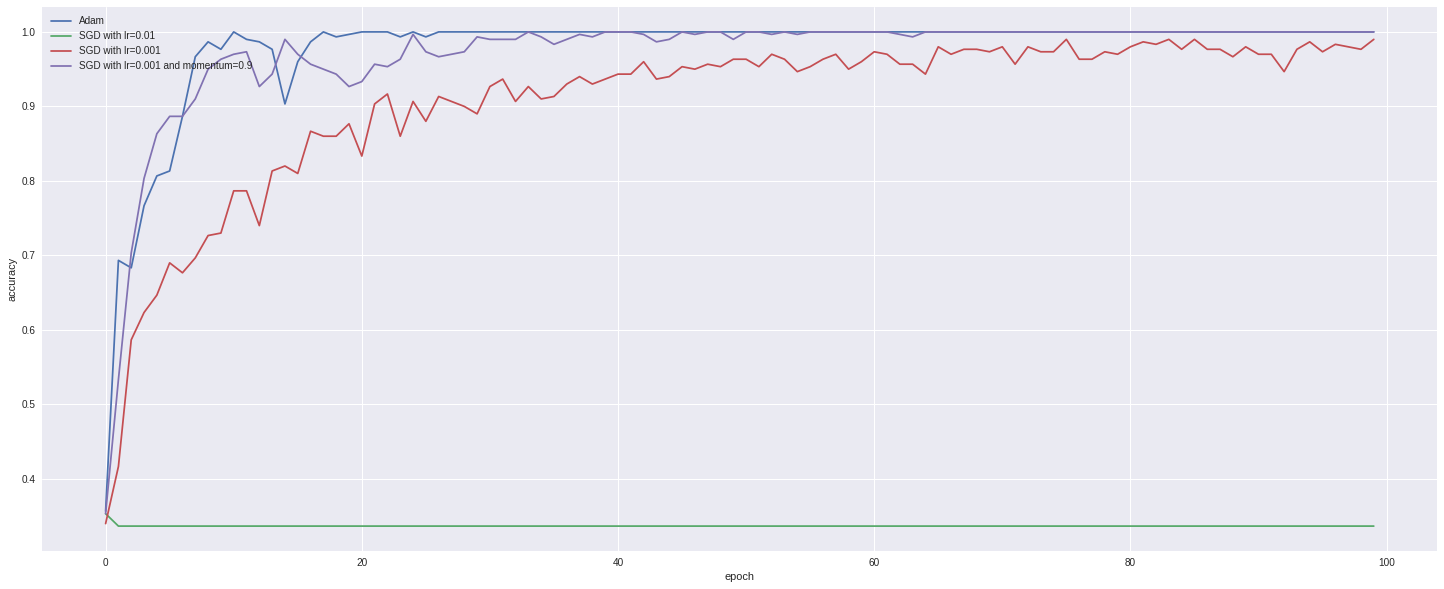

In [5]:
plt.figure(figsize=(25,10))
plt.plot(evolution_ADAM.history['acc'])
plt.plot(evolution_SGD_1.history['acc'])
plt.plot(evolution_SGD_2.history['acc'])
plt.plot(evolution_SGD_3.history['acc'])
plt.legend(['Adam', 'SGD with lr=0.01',"SGD with lr=0.001","SGD with lr=0.001 and momentum=0.9"], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')

When we valuate the models in a test set, I found an accuracy of $99.6%$ for the SGD with momentum. The ADAM optimizer gets a smaller value for the loss function an accuracy of $100\%$. In this example, I would choose the ADMA

In [6]:
print("ADAM "+str(model_ADAM.evaluate(X_test,Y_test,verbose=0)))
print('SGD with lr=0.01 '+str(model_SGD_1.evaluate(X_test,Y_test,verbose=0)))
print("SGD with lr=0.001 "+str(model_SGD_2.evaluate(X_test,Y_test,verbose=0)))
print("SGD with lr=0.001 and momentum=0.9 "+str(model_SGD_3.evaluate(X_test,Y_test,verbose=0)))

ADAM [0.009042827195177476, 1.0]
SGD with lr=0.01 [10.530488878885905, 0.346666667064031]
SGD with lr=0.001 [0.21741157909234365, 0.9200000007947285]
SGD with lr=0.001 and momentum=0.9 [0.032271040380001066, 1.0]


# Visualization of the solution

The figures below show the weights of the links that go from each pixel to each category. The categories are rectangle, disk and triangle, in that order. I compared the ADAM and the SGD with momentum models. The darker the pixer the bigger the value of the weight of the pixel in the soft-max function of the corresponding category. 

These figures give us an intuition about what features the NN is stracting from the data to classify yhe images.In both models, we can see a rectangle and a triangle detector. For the remainning figures, the results are not clear. It is interesting how, even in a easy task is difficult to interpret what a nn is doing. 

Nevertheless, in both models, the three figures are different showing that the soft-max functions ponderate differently the pixels accordind to the figure they train to predict.

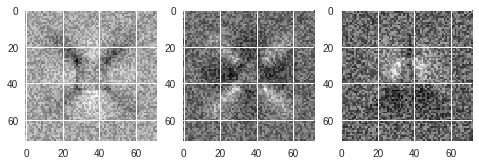

In [7]:
IMAGE_SIZE=72
cl0=model_SGD_3.get_weights()[0][:,0]
cl1=model_SGD_3.get_weights()[0][:,1]
cl2=model_SGD_3.get_weights()[0][:,2]

plt.subplot(1, 3, 1)
plt.imshow(cl0.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(cl1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(cl2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

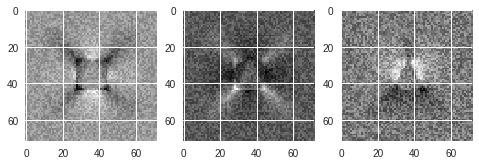

In [8]:
IMAGE_SIZE=72
cl0=model_ADAM.get_weights()[0][:,0]
cl1=model_ADAM.get_weights()[0][:,1]
cl2=model_ADAM.get_weights()[0][:,2]

plt.subplot(1, 3, 1)
plt.imshow(cl0.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(cl1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(cl2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

# A more difficult classification problem.

In this part, once again, I tried to predict the cluster of each observation, but this time the position and orientation of the figures change. I tried multiple models with relu and softmax as activation functions. In all cases I use the crossentropy as loss function.I show here the results for the model suggested in the HW without any regulization and another model with regularization and an extra fully connected network.

I generated 1000 samples of the train set as I see that the models had problems to generalize with only 300.

In [9]:
[X_train, Y_train] = generate_dataset_classification(1000, 20, True, verbose=False)
X_train=X_train.reshape(X_train.shape[0],72,72,1)
Y_train=np_utils.to_categorical(Y_train)

Creating data:


Suggested model in the HW: 1 convolutional layer with 16 5x5 flters, 1 pooling layer, and one fully connected layer.

In [10]:
model_suggested=Sequential()
model_suggested.add(Conv2D(16,(5,5),activation="relu",input_shape=(72,72,1)))
model_suggested.add(MaxPooling2D(pool_size=(3,3)))
model_suggested.add(Flatten())
model_suggested.add(Dense(3,activation="softmax"))
model_suggested.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model_suggested.fit(X_train,Y_train,
          batch_size=32,epochs=100,verbose=0)

Model that improves results (model 2) : Suggested model in the HW: 1 convolutional layer with 16 5x5 flters, 1 pooling layer, and two fully connected layer and with dropout to avoid overfiting   

In [11]:
model_2=Sequential()
model_2.add(Conv2D(16,(5,5),activation="relu",input_shape=(72,72,1)))
model_2.add(MaxPooling2D(pool_size=(3,3)))
model_2.add(Dropout(0.25))
model_2.add(MaxPooling2D(pool_size=(3,3)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(128,activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(3,activation="softmax"))
model_2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
model_2.fit(X_train,Y_train,
          batch_size=32,epochs=100,verbose=0)

I generated a test set to compare both models.

In [12]:
[X_test, Y_test]=generate_test_set_classification(True,verbose=False)
X_test=X_test.reshape(X_test.shape[0],72,72,1)

Creating data:


After training the suggested model, I realized that the difference between the accuracy in the train and test set was big showing overfitting. 
A way to avoid this is to use regularization, for that reason in model 2 I add dropout, that is in the training , the algorithm eliminate some paths with a given probability. I also added a layer. This improved considerable the model as we can see: going from an accuracy of $87\%$ to an accuracy of $95\%$ in the test set. We can see how the gap between the accuracies in model 2 is smaller showing a smaller degree of overfitting. 

In [13]:
print("Model suggested in train set "+str(model_suggested.evaluate(X_train,Y_train,verbose=2)))
print("Model suggested in test set "+str(model_suggested.evaluate(X_test,Y_test,verbose=2)))
print("Model 2 in train set "+str(model_2.evaluate(X_train,Y_train,verbose=2)))
print("Model 2 in test set "+str(model_2.evaluate(X_test,Y_test,verbose=2)))

Model suggested in train set [0.016812935300171375, 0.999]
Model suggested in test set [0.43014482378959656, 0.8566666674613953]
Model 2 in train set [0.019597474977374078, 0.996]
Model 2 in test set [0.11573949029048283, 0.953333334128062]


# A regression problem.

In this part, I trained different CNN to detect the vertices of a triangle. As this problem is harder than a classification problem,  I increased the number of samples to 5000. 
I started by doing a normalization of the train set. That is, I reordered the set of vertices according to their x value. 

I also tried to order the vertices according to the angles of the triangle. But I was not satisfied with the results. 

I got the best results by ordering by the x value.


In [0]:
def order_corners(Y):
    Y_ordered=Y_train
    for i in range(Y.shape[0]):
        first_point=np.argsort([Y[i][0],Y[i][2],Y[i][4]])
        Y_ordered[i][[0,2,4]]=Y_train[i][[0,2,4]][first_point]
        Y_ordered[i][[1,3,5]]=Y_train[i][[1,3,5]][first_point]
    return(Y_ordered)

In [15]:
[X_train, Y_train] = generate_dataset_regression(5000, 20,verbose=False)

Creating data:


In [0]:
X_train=X_train.reshape(X_train.shape[0],72,72,1)

In [0]:
Y_train_ordered=order_corners(Y_train)

The first model I analyzed was the suggested one. The results are far away of being optimal. The problem requiere us to learn features that depend on the position and orientation of the triangle and just using a convolutional network is enable to do that.

In [18]:
mcp = ModelCheckpoint('suggested_reg_model.hdf5', monitor="val_loss",
                      save_best_only=True, save_weights_only=False)
model_suggested_reg=Sequential()
model_suggested_reg.add(Conv2D(16,(5,5),activation="relu",input_shape=(72,72,1)))
model_suggested_reg.add(MaxPooling2D(pool_size=(3,3)))
model_suggested_reg.add(Flatten())
model_suggested_reg.add(Dense(6))
model_suggested_reg.compile(loss="mean_squared_error",
              optimizer="adam")
model_suggested_reg.fit(X_train,Y_train_ordered,
          batch_size=32,validation_split=0.1,epochs=300,verbose=2,callbacks=[mcp])

Train on 4500 samples, validate on 500 samples
Epoch 1/300
 - 1s - loss: 0.0468 - val_loss: 0.0253
Epoch 2/300
 - 1s - loss: 0.0237 - val_loss: 0.0221
Epoch 3/300
 - 1s - loss: 0.0204 - val_loss: 0.0207
Epoch 4/300
 - 1s - loss: 0.0183 - val_loss: 0.0183
Epoch 5/300
 - 1s - loss: 0.0165 - val_loss: 0.0179
Epoch 6/300
 - 1s - loss: 0.0155 - val_loss: 0.0170
Epoch 7/300
 - 1s - loss: 0.0148 - val_loss: 0.0165
Epoch 8/300
 - 1s - loss: 0.0142 - val_loss: 0.0158
Epoch 9/300
 - 1s - loss: 0.0135 - val_loss: 0.0157
Epoch 10/300
 - 1s - loss: 0.0130 - val_loss: 0.0155
Epoch 11/300
 - 1s - loss: 0.0126 - val_loss: 0.0151
Epoch 12/300
 - 1s - loss: 0.0124 - val_loss: 0.0145
Epoch 13/300
 - 1s - loss: 0.0118 - val_loss: 0.0153
Epoch 14/300
 - 1s - loss: 0.0115 - val_loss: 0.0157
Epoch 15/300
 - 1s - loss: 0.0113 - val_loss: 0.0151
Epoch 16/300
 - 1s - loss: 0.0109 - val_loss: 0.0152
Epoch 17/300
 - 1s - loss: 0.0106 - val_loss: 0.0144
Epoch 18/300
 - 1s - loss: 0.0103 - val_loss: 0.0146
Epoch 19

In [19]:
[X_test, Y_test] = generate_test_set_regression(verbose=False)
X_test=X_test.reshape(X_test.shape[0],72,72,1)
Y_test_ordered=order_corners(Y_test)

Creating data:


In [0]:
Y_predict_1=model_suggested_reg.predict(X_test)

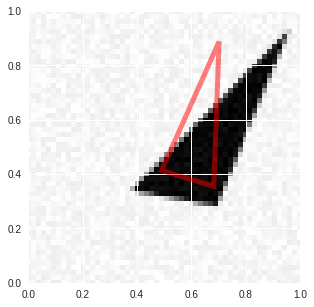

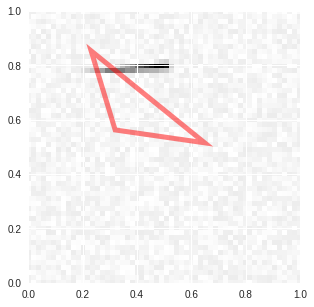

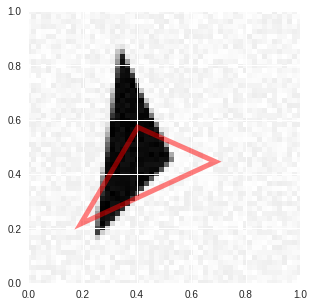

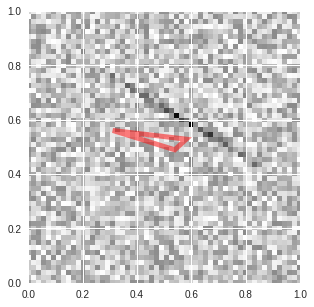

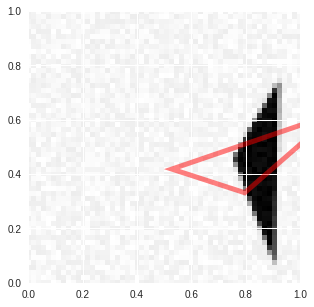

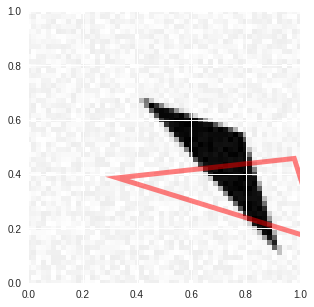

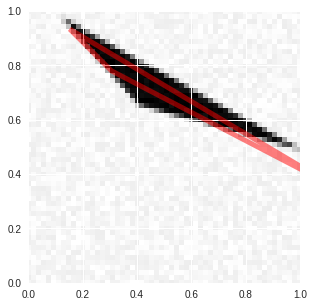

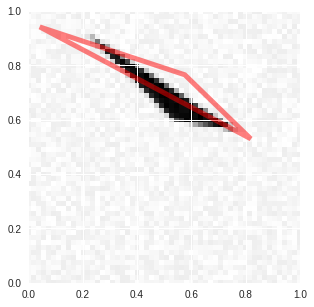

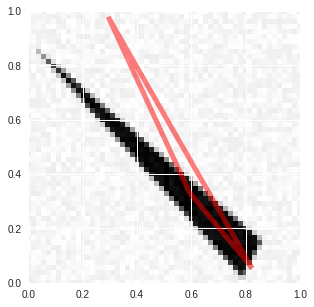

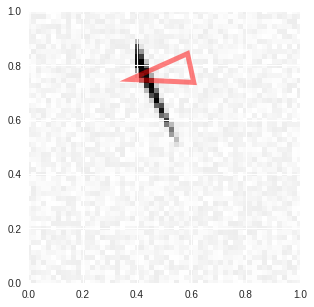

In [21]:
for i in range(10):
    visualize_prediction(X_test[i], Y_predict_1[i])  

For the secon model,I increased the number of convulutional layers, a dense layer and I added dropout to avoid overfitting. The results are better, but they can be improved. 

In [22]:
model_2_reg=Sequential()
model_2_reg.add(Conv2D(32,(5,5),activation="relu",input_shape=(72,72,1)))
model_2_reg.add(MaxPooling2D(pool_size=(2,2)))
model_2_reg.add(Dropout(0.5))
model_2_reg.add(Conv2D(32,(5,5),activation="relu",input_shape=(72,72,1)))
model_2_reg.add(MaxPooling2D(pool_size=(2,2)))
model_2_reg.add(Dropout(0.25))
model_2_reg.add(Conv2D(32,(5,5),activation="relu",input_shape=(72,72,1)))
model_2_reg.add(MaxPooling2D(pool_size=(2,2)))
model_2_reg.add(Flatten())
model_2_reg.add(Dropout(0.25))
model_2_reg.add(Dense(64,activation="relu"))
model_2_reg.add(Dense(6))
adam = optimizers.adam(lr=1e-4)
model_2_reg.compile(loss="mean_squared_error",optimizer=adam)
model_2_reg.fit(X_train,Y_train_ordered,
          batch_size=32,validation_split=0.1,epochs=250,verbose=2)

Train on 4500 samples, validate on 500 samples
Epoch 1/250
 - 3s - loss: 0.0851 - val_loss: 0.2369
Epoch 2/250
 - 2s - loss: 0.0617 - val_loss: 0.1832
Epoch 3/250
 - 2s - loss: 0.0504 - val_loss: 0.1612
Epoch 4/250
 - 2s - loss: 0.0454 - val_loss: 0.1380
Epoch 5/250
 - 2s - loss: 0.0420 - val_loss: 0.1148
Epoch 6/250
 - 2s - loss: 0.0394 - val_loss: 0.1085
Epoch 7/250
 - 2s - loss: 0.0370 - val_loss: 0.0914
Epoch 8/250
 - 2s - loss: 0.0349 - val_loss: 0.0835
Epoch 9/250
 - 2s - loss: 0.0329 - val_loss: 0.0790
Epoch 10/250
 - 2s - loss: 0.0317 - val_loss: 0.0734
Epoch 11/250
 - 2s - loss: 0.0302 - val_loss: 0.0698
Epoch 12/250
 - 2s - loss: 0.0290 - val_loss: 0.0647
Epoch 13/250
 - 2s - loss: 0.0280 - val_loss: 0.0567
Epoch 14/250
 - 2s - loss: 0.0273 - val_loss: 0.0582
Epoch 15/250
 - 2s - loss: 0.0262 - val_loss: 0.0517
Epoch 16/250
 - 2s - loss: 0.0254 - val_loss: 0.0489
Epoch 17/250
 - 2s - loss: 0.0245 - val_loss: 0.0470
Epoch 18/250
 - 2s - loss: 0.0238 - val_loss: 0.0452
Epoch 19

In [0]:
Y_predict_2=model_2_reg.predict(X_test)

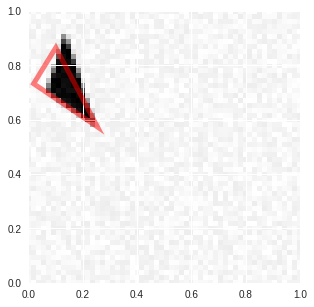

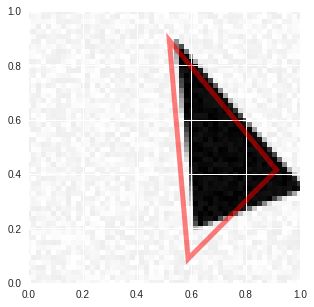

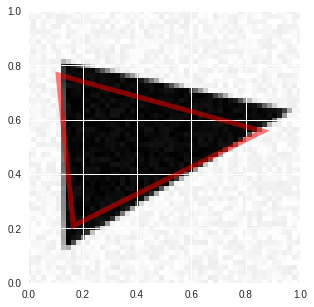

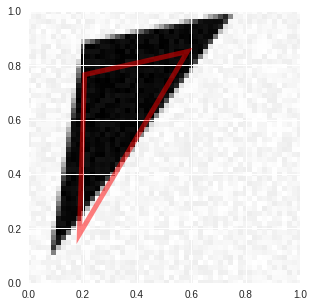

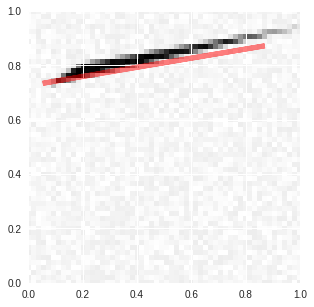

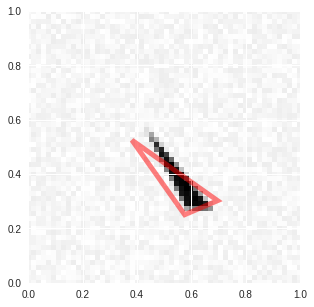

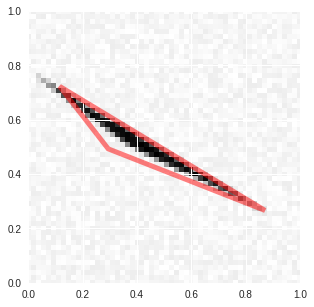

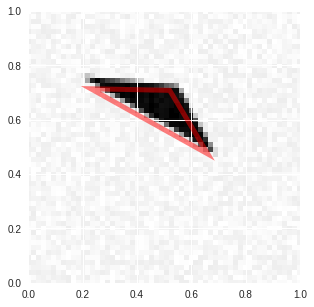

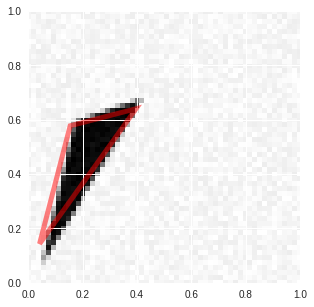

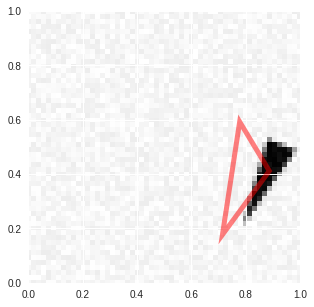

In [24]:
for i in range(40,50):
    visualize_prediction(X_test[i], Y_predict_2[i])  

# Image denoising 

I generated a train set with 500 samples.

In [25]:
[X_train,Y_train] = generate_dataset_denoising(500, 20,True,verbose=False)

Creating data:


In [0]:
X_train=X_train.reshape(X_train.shape[0],72,72,1)
Y_train=Y_train.reshape(Y_train.shape[0],72,72,1)

I trained different hourglass networks. Here you can see the one that I could train faster and had a good performance. Normally, this kind of architecture is used in image segmentation, but in this case I tried to predict the pixel intensity by doing a regression task. For that reason, I did experiments with both loss functions , "mean_squared_error" and "mean_absolute_error". I preferred the results given by the "mean_squared_error". 

In a normal hourglass architecture, batchnormalization is done after convolutional layers in order to guarantee the stability of the network during the training and it reduces overfitting. Nevetheless, in this particular case, it just made the training process slower and it did not improve the results, so I did not include it. 

The trained hourglas networks use Pooling and Upsampling of dimension 2x2.

In [27]:
mcp = ModelCheckpoint('denoising_model_1.hdf5', monitor="val_loss",
                      save_best_only=True, save_weights_only=False)


neural_input=Input((72,72,1))

conv1=Conv2D(10,(5,5),activation="relu",padding="same")(neural_input)
#conv1=BatchNormalization()(conv1)
conv1=Conv2D(10,(5,5),activation="relu",padding="same")(conv1)
#conv1=BatchNormalization()(conv1)
pool1=MaxPooling2D(pool_size=(2,2))(conv1)

conv2=Conv2D(20,(5,5),activation="relu",padding="same")(pool1)
#conv2=BatchNormalization()(conv2)
conv2=Conv2D(20,(5,5),activation="relu",padding="same")(conv2)
#conv2=BatchNormalization()(conv2)
pool2=MaxPooling2D(pool_size=(2,2))(conv2)

conv3=Conv2D(40,(5,5),activation="relu",padding="same")(pool2)
#conv3=BatchNormalization()(conv3)
conv3=Conv2D(40,(5,5),activation="relu",padding="same")(conv3)
#conv3=BatchNormalization()(conv3)

up4=UpSampling2D(size=(2,2))(conv3)

up_conv4=Conv2D(20,(5,5),activation="relu",padding="same")(up4)
#up_conv4=BatchNormalization()(up_conv4)
merge4 = concatenate([conv2,up_conv4],axis=3)
conv4=Conv2D(20,(5,5),activation="relu",padding="same")(merge4)
#conv4=BatchNormalization()(conv4)

up5=UpSampling2D(size=(2,2))(conv4)
up_conv5=Conv2D(10,(5,5),activation="relu",padding="same")(up5)
#up_conv5=BatchNormalization()(up_conv5)
merge5 = concatenate([conv1,up_conv5],axis=3)
conv5=Conv2D(10,(5,5),activation="relu",padding="same")(merge5)
#conv5=BatchNormalization()(conv5)

conv6 = Conv2D(1,(1,1),activation="relu")(conv5)
#conv6=BatchNormalization()(conv6)

model_1=Model(inputs=neural_input,outputs=conv6)
model_1.compile(optimizer="adam",loss="mean_squared_error")

model_1.fit(X_train,Y_train,validation_split=0.1,
          batch_size=100,epochs=50,verbose=1,callbacks=[mcp])

Train on 450 samples, validate on 50 samples
Epoch 1/50
450/450 [==============================] - 3s 6ms/step - loss: 0.7173 - val_loss: 0.5250
Epoch 2/50
450/450 [==============================] - 1s 2ms/step - loss: 0.2388 - val_loss: 0.1148
Epoch 3/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0944 - val_loss: 0.0555
Epoch 4/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0568 - val_loss: 0.0430
Epoch 5/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0425 - val_loss: 0.0337
Epoch 6/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0314 - val_loss: 0.0251
Epoch 7/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0234 - val_loss: 0.0192
Epoch 8/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0186 - val_loss: 0.0149
Epoch 9/50
450/450 [==============================] - 1s 2ms/step - loss: 0.0147 - val_loss: 0.0117
Epoch 10/50
450/450 [==============================] - 

You can access to the training model using this line.

In [28]:
[X_test, Y_test] = generate_test_set_denoising(verbose=False)

Creating data:


In [0]:
X_test=X_test.reshape(X_test.shape[0],72,72,1)
Y_test=Y_test.reshape(Y_test.shape[0],72,72,1)

This architecture gets  values of 8e-4 of the mean_squared_loss function in the test set and we can see in the fictures how it eliminates noise from the images efficiently. 

In [30]:
model_1.evaluate(X_test,Y_test,verbose=2)

0.0005734866733352344

In [0]:
Y_predict_1=model_1.predict(X_test)

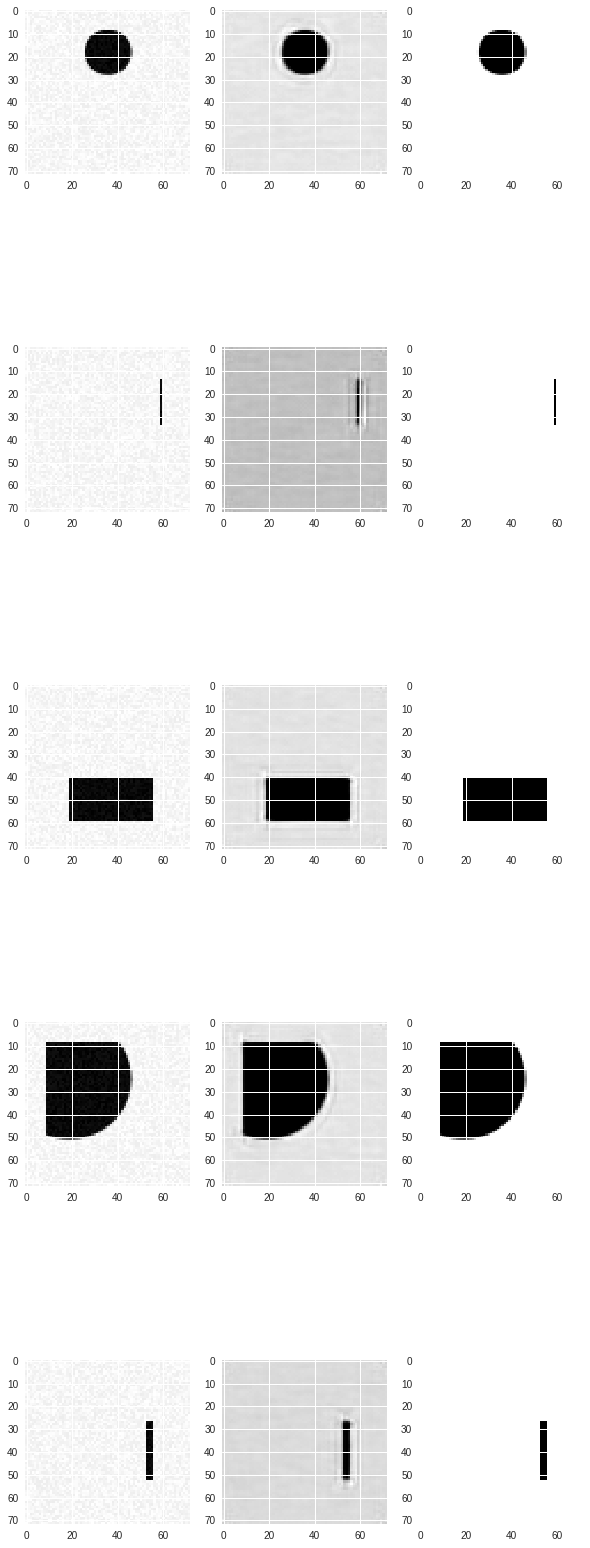

In [32]:
fig=plt.figure(figsize=(10,30))
for i in range(5):
    plt.subplot(5, 3,3*i+1)
    plt.imshow(X_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.subplot(5, 3,3*i+2)
    plt.imshow(Y_predict_1[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.subplot(5, 3,3*i+3)
    plt.imshow(Y_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


In a second model, I tried to predict whether the pixel was black of white and I performed image segmentation based on the previous hourglass architecture, without Batchnormalization, but in this case I added an adittional block of convolutional networks with 2 convolutional networks with 80 filters. I also changed the concatenation order. Now, I concatenated each Upsampling with the previous convolutional network of the same dimension.  As the approach changed, the final network returns the probability of being white or black and the loss function is the binary crosss entropy.

In [33]:
mcp = ModelCheckpoint('denoising_model_2.hdf5', monitor="val_loss",
                      save_best_only=True, save_weights_only=False)

neural_input=Input((72,72,1))

conv1=Conv2D(10,(5,5),activation="relu",padding="same")(neural_input)
conv1=Conv2D(10,(5,5),activation="relu",padding="same")(conv1)
pool1=MaxPooling2D(pool_size=(2,2))(conv1)

conv2=Conv2D(20,(5,5),activation="relu",padding="same")(pool1)
conv2=Conv2D(20,(5,5),activation="relu",padding="same")(conv2)
pool2=MaxPooling2D(pool_size=(2,2))(conv2)

conv3=Conv2D(40,(5,5),activation="relu",padding="same")(pool2)
conv3=Conv2D(40,(5,5),activation="relu",padding="same")(conv3)
pool3=MaxPooling2D(pool_size=(2,2))(conv3)

conv4=Conv2D(80,(5,5),activation="relu",padding="same")(pool3)
conv4=Conv2D(80,(5,5),activation="relu",padding="same")(conv4)

up5=UpSampling2D(size=(2,2))(conv4)
merge5 = concatenate([conv3,up5],axis=3)

conv5=Conv2D(40,(5,5),activation="relu",padding="same")(merge5)
conv5=Conv2D(40,(5,5),activation="relu",padding="same")(conv5)

up6=UpSampling2D(size=(2,2))(conv5)
merge6 = concatenate([conv2,up6],axis=3)

conv6=Conv2D(20,(5,5),activation="relu",padding="same")(merge6)
conv6=Conv2D(20,(5,5),activation="relu",padding="same")(conv6)

up7=UpSampling2D(size=(2,2))(conv6)
merge7 = concatenate([conv1,up7],axis=3)

conv7=Conv2D(10,(5,5),activation="relu",padding="same")(merge7)
conv7=Conv2D(10,(5,5),activation="relu",padding="same")(conv7)

conv8 = Conv2D(1,(1,1),activation="sigmoid")(conv7)
model_cross_entropy=Model(inputs=neural_input,outputs=conv8)
model_cross_entropy.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
model_cross_entropy.fit(X_train,Y_train,validation_split=0.1,
          batch_size=100,epochs=100,verbose=2,callbacks=[mcp])

Train on 450 samples, validate on 50 samples
Epoch 1/100
 - 3s - loss: 0.6950 - acc: 0.4567 - val_loss: 0.5315 - val_acc: 0.9060
Epoch 2/100
 - 1s - loss: 0.4453 - acc: 0.9016 - val_loss: 0.3411 - val_acc: 0.9100
Epoch 3/100
 - 1s - loss: 0.2822 - acc: 0.9027 - val_loss: 0.2083 - val_acc: 0.9100
Epoch 4/100
 - 1s - loss: 0.2060 - acc: 0.9027 - val_loss: 0.1651 - val_acc: 0.9100
Epoch 5/100
 - 1s - loss: 0.1686 - acc: 0.9027 - val_loss: 0.1479 - val_acc: 0.9100
Epoch 6/100
 - 1s - loss: 0.1495 - acc: 0.9027 - val_loss: 0.1249 - val_acc: 0.9100
Epoch 7/100
 - 1s - loss: 0.1252 - acc: 0.9027 - val_loss: 0.1034 - val_acc: 0.9100
Epoch 8/100
 - 1s - loss: 0.1063 - acc: 0.9027 - val_loss: 0.0846 - val_acc: 0.9100
Epoch 9/100
 - 1s - loss: 0.0881 - acc: 0.9027 - val_loss: 0.0772 - val_acc: 0.9100
Epoch 10/100
 - 1s - loss: 0.0794 - acc: 0.9029 - val_loss: 0.0716 - val_acc: 0.9369
Epoch 11/100
 - 1s - loss: 0.0747 - acc: 0.9540 - val_loss: 0.0649 - val_acc: 0.9738
Epoch 12/100
 - 1s - loss: 0.

The performance of this architecture is also satisfying, getting an accuracy of  almost  99% in the test set.
As mentioned before, the results show the probability of each pixel of being white of black. In this model, the figures are more friendly to the human eye, as the fond is white. 

In [34]:
model_cross_entropy.evaluate(X_test,Y_test,verbose=2)

[0.005975039917975664, 0.9891107265154521]

In [0]:
Y_predict_2=model_cross_entropy.predict(X_test)

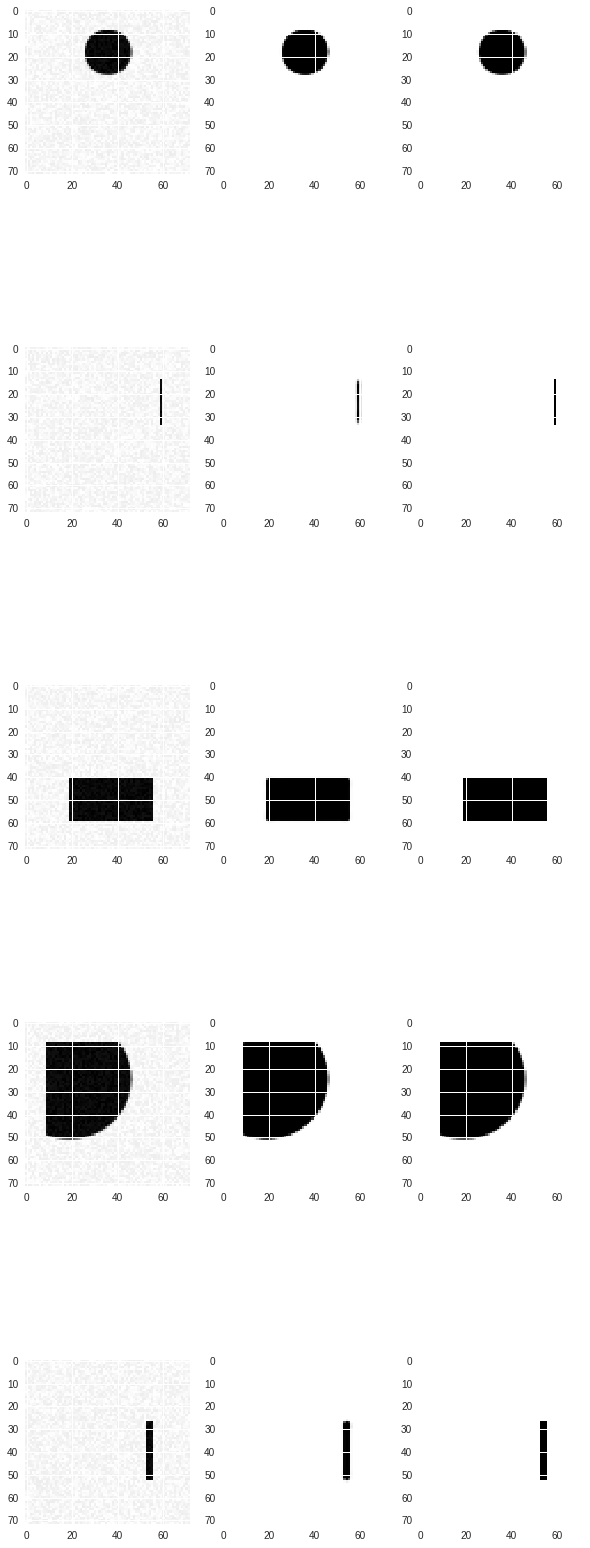

In [36]:
fig=plt.figure(figsize=(10,30))
for i in range(5):
    plt.subplot(5, 3,3*i+1)
    plt.imshow(X_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.subplot(5, 3,3*i+2)
    plt.imshow(Y_predict_2[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.subplot(5, 3,3*i+3)
    plt.imshow(Y_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
